---
title: "Day1 실습"
author: "박성일"
date: "2024-08-06"
description: "미니프로젝트 Day1"
format: 
  html:
    toc: true

---

# ◆ 0. 데이터 불러오기

In [25]:
import pandas as pd

# 한글 크롤링 -> LG씽큐 앱 리뷰 데이터
data = pd.read_csv("data/한글 크롤링.csv")

# datetime으로 바꾸는건데 안해도됨됨
year = [i[0] for i in data["Date"].str.split("년")]
month = [i[1].split("월")[0].strip().zfill(2) for i in data["Date"].str.split("년")]
day = [i[1].split("월")[1].replace("일","").strip().zfill(2) for i in data["Date"].str.split("년")]
data['Date'] = pd.to_datetime(["-".join(i) for i in zip(year,month,day)])

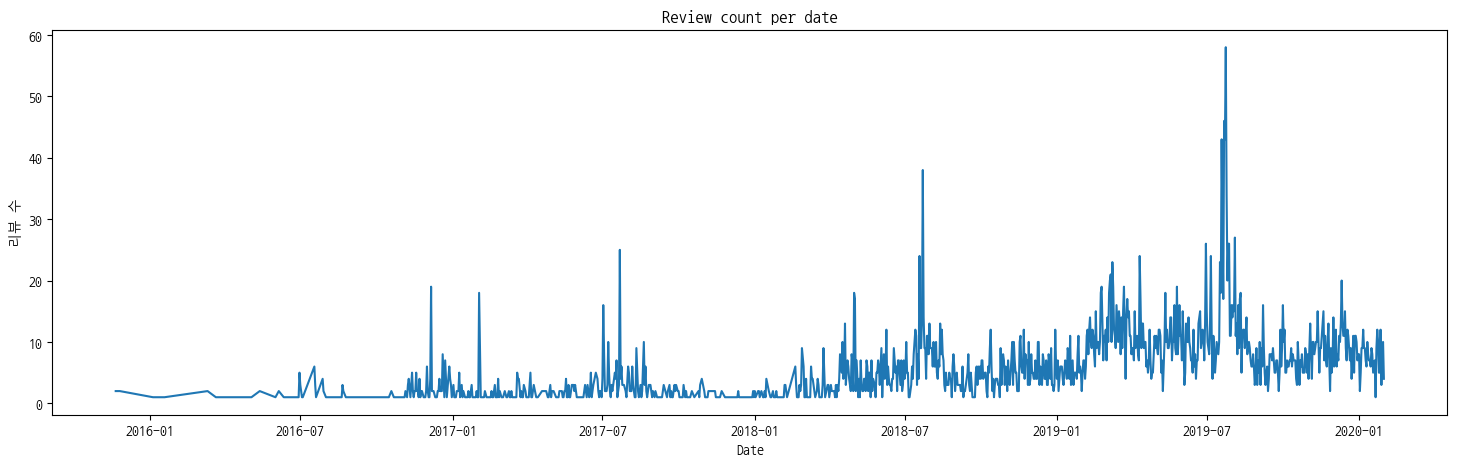

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothicCoding')
mpl.rcParams['axes.unicode_minus'] = False
review_per_date = pd.DataFrame(data['Date'].value_counts()).sort_values('Date')

plt.figure(figsize=(18,5))
plt.plot(review_per_date)
plt.xlabel("Date")
plt.ylabel("리뷰 수")
plt.title("Review count per date")

plt.show()

# ◆ 1. 데이터 전처리하기
* 1.1. 특수문자 및 숫자 제거
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [27]:
import re
from tqdm import tqdm
pattern = r"[^a-zA-Z0-9가-힣\s\.\?\!]"

new_review = []

for i in tqdm(data['Review']):
    text = re.sub(pattern, "", i)
    new_review.append(text)

data['Review_clean'] = new_review
data.head()

100%|██████████| 6280/6280 [00:00<00:00, 599800.28it/s]


,Date,Name,Score,Review,like,Review_clean
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...


### 1.2. 의미없는 짧은 글 제거

In [28]:
df = data.drop([i for i,j in enumerate(data["Review_clean"]) if len(j) <10])
df.head()

,Date,Name,Score,Review,like,Review_clean
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...


# ◆ 2. 데이터 형태소 분리하기
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv)

In [29]:
from konlpy.tag import Okt
okt=Okt()
#원하는 태그 추출 & 불용어 제거
stopword_df = pd.read_csv('data/ko-stopwords.csv')
stopwords = list(stopword_df['stopwords'])

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True) # norm은 약간의 오타 교정

    tagged_list=[]
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in stopwords:
                tagged_list.append(word)
    if len(tagged_list) == 0 :
      tagged_list.append("None")
    return tagged_list

### 2.2 데이터 프레임에 추가

In [30]:
df['tagged_review'] = df['Review_clean'].apply(okt_pos_tagging)
df.head()

,Date,Name,Score,Review,like,Review_clean,tagged_review
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기..."
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속..."
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김..."
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ..."
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ..."


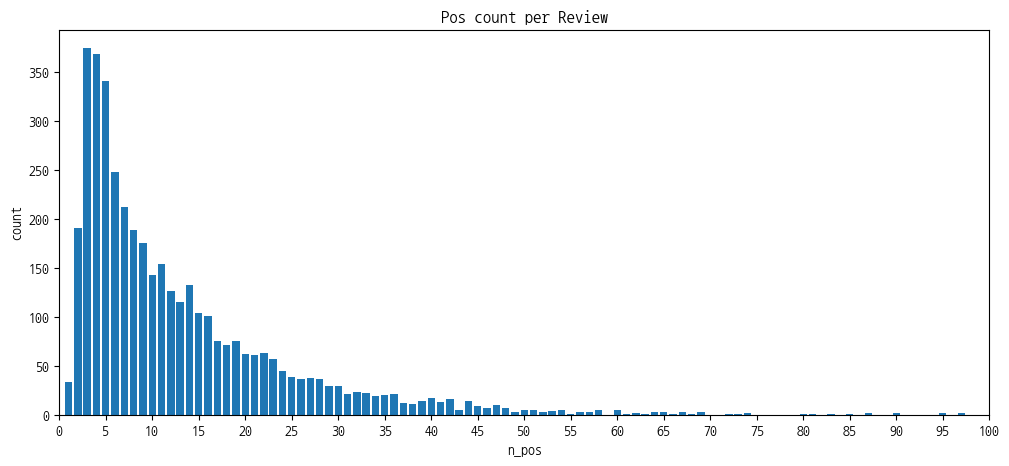

In [31]:
df["n_pos"] = [len(i) for i in df['tagged_review']]
pos_per_review = df.groupby("n_pos").count()
plt.figure(figsize=(12,5))
plt.bar(pos_per_review.index, pos_per_review['tagged_review'])
plt.xlabel("n_pos")
plt.xticks(range(0,250,5))
plt.ylabel("count")
plt.title('Pos count per Review')
plt.xlim(0,100)

plt.show()

# ◆ 3. 벡터화
* 3.1 doc2vec 준비(문서의 순서 매기기)
* 3.2 doc2vec 학습시키기
* 3.3 벡터 값 데이터 프레임에 추가

### 3.1 doc2vec 준비
    - word2vec은 단어 하나를 하나의 vector화
    - doc2vec은 문서 하나를 하나의 vector화

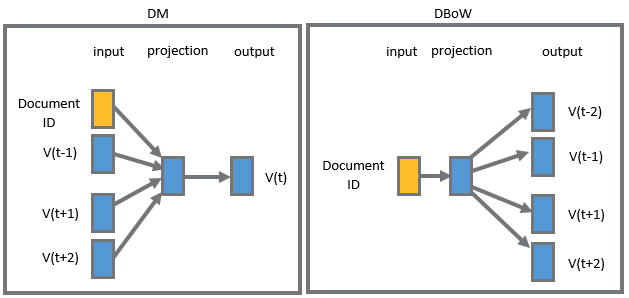

In [32]:
from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument
# doc2vec
tagged_corpus_list = []

for i, token in enumerate(df.tagged_review):
    tag = "document {}".format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = token))
print('문서의 수 :', len(tagged_corpus_list))

문서의 수 : 4061


### 3.2 doc2vec 학습시키기
    <model 하이퍼파라미터 값>
    # vector_size : 생성할 문서 벡터의 크기
    # alpha: 모델 학습시 초기 학습률 0.025는 일반적으로 사용됨
    # min_alpha: 학습 과정에서 alpha 값을 이 값으로 줄여나가게 됩니다
    # window : 문맥 윈도우 크기, 주변 몇개의 단어의 문맥을 고려하여 학습하는가

In [33]:
#doc2vec모델
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=8)

# Vocabulary 빌드
model.build_vocab(tagged_corpus_list)

# Doc2Vec 학습
#epochs가 너무 많이 돌아가면 과적합의 가능성 / 학습속도 느려짐
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

### 3.3 벡터 값 데이터 프레임에 추가

In [34]:
vector_list = []

for i in tqdm(range(len(df))):
    doc2vec = model.dv["document {}".format(i)]
    vector_list.append(doc2vec)

df['vetor'] = vector_list

100%|██████████| 4061/4061 [00:00<00:00, 636797.84it/s]


In [35]:
df.head()

,Date,Name,Score,Review,like,Review_clean,tagged_review,n_pos,vetor
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...",48,"[-0.039625153, 0.01851053, -0.021416439, -0.03..."
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...",40,"[-0.011139594, -0.013532177, -0.030620487, -0...."
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...",58,"[-0.030485945, 0.00868939, 0.015364446, -0.005..."
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...",32,"[-0.010480184, 0.0110085625, -0.0012623551, -0..."
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...",45,"[-0.015105196, -0.01366063, -0.035027415, -0.0..."


# ◆ 4. 병합 계층적 클러스터링
* 4.1 ward 기준으로 덴드로그램 그려보기
* 4.2 실루엣 지수 확인해서 토픽 갯수 정하기
* 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### 4.1 ward 기준으로 덴드로그램 그려보기

### 4.2 실루엣 지수 확인해서 토픽 갯수 정하기

In [37]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

### 4.3 가장 적절한 클러스터링 갯수 df에 삽입

# ◆ 5. 해석하기:TF-IDF
* 문서 내에서 어떤 단어가 얼마나 중요한지를 평가하는 데 사용되는 방법
* 5.1 TF-IDF 계산
* 5.2 데이터프레임으로 만들고 정렬하기

### 5.1 TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [38]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

### 5.2 데이터프레임으로 만들고 정렬하기